In [1]:
import os
import numpy as np
import pandas as pd

import random

import seaborn as sns
#import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Import data set.

In [2]:
df_count=pd.read_csv('count_data.csv')

In [3]:
df_song=pd.read_csv('song_data.csv')

# Data preprocessing.

In [4]:
df_count.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [5]:
df_song.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [6]:
#delete the first column of df_count
df_count=df_count.iloc[: , 1:]

In [7]:
df_count.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [8]:
df_count['user_id'].count()

2000000

# Understanding the data sets.

Next, check the length of song_id in both datasets. 

In [9]:
df_count['song_id'].count()

2000000

In [10]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [11]:
df_song['song_id'].count()

1000000

In [12]:
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [13]:
df_count['play_count'].astype(np.int32,copy=True)

0          1
1          2
2          1
3          1
4          1
          ..
1999995    2
1999996    4
1999997    3
1999998    1
1999999    1
Name: play_count, Length: 2000000, dtype: int32

In [14]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


**There are 2000000 'song_id' in df_count, but 1000000 'song_id' in df_song. So there are at least 2000000-1000000 songs without information about 'title', 'Release', 'Artist_name' and 'year'.**

Check the length of "title" in df_song. Ideally, it should match with the length of "song_id" in the same dataframe. 

In [15]:
df_song['title'].count()

999985

**We have 15 less "titles" than "song_id" in df_song.**

Let's check for missing values in each data set.

**Find missing values in each column of df_count.**

In [16]:
# Find number of missing values in each column
df_count.isna().sum()

user_id       0
song_id       0
play_count    0
dtype: int64

There is **no** missing values in df_count.


**Find missing values in each column of df_song**

In [17]:
# Find number of missing values in each column
df_song.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

**There are missing value in df_song: column "title" has 15 missing values, column "Release" has 5 missing values.**

**Now, let's check for any duplicates in the two data sets.**

In [18]:
# Check df_count
print("The number of unique song_id in df_count is", df_count.song_id.nunique())# Count the number of unique song_id.
print("The number of unique user_id in df_count is", df_count.user_id.nunique())# # Count the number of unique user_id.

The number of unique song_id in df_count is 10000
The number of unique user_id in df_count is 76353


In [19]:
# Check df_song
print("The number of unique song_id in df_song is", df_song.song_id.nunique())# Count the number of unique song_id.
print("The number of unique title in df_song is", df_song.title.nunique())# Count the number of unique title.


The number of unique song_id in df_song is 999056
The number of unique title in df_song is 702428


**Notice the number of unique song_id (999056) is more than the number of unique title (702428).** 
- One possibility is that the same song was incorrectly marked with different song_id. Another possibility is that different songs have the same title. This is something that can be investigated further. 

- Also notice that the number of unique songs in df_count (10000) is significantly smaller than the number of unique songs in df_song (999056). df_count is the only data set that contains information about play_count. Since play_count is a good indicator of the likelihood of a user listening to the song, I will combine data set df_count with df_song. By doing so, there is going to be only 10000 unique songs left in the combine data set. This reduces the size of the data significantly and also reduces sparseness of the interaction matrix. In addition, there is no need to investigate how the number of "song_id" is different from the number of "title".

- However, it is worth noticing that if the recommendation system is based on for example "Artist", then it may not be a good idea to combine the two data sets early on since we will lose a lot of information about the "song_id" and "title". Also, in that recommendation system, we need to understand why the number of unique song_id is different from the number of unique "title".

# Preprocessing.

**Merge the two data sets using "song_id".**

In [20]:
df=pd.merge(df_count, df_song.drop_duplicates(['song_id']), on="song_id", how="left")

In [21]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


**Which one is the most interacted song in the dataset?**


In [23]:
df['song_id'].value_counts()

SOFRQTD12A81C233C0    8277
SOAUWYT12A81C206F1    7032
SOAXGDH12A8C13F8A1    6949
SOBONKR12A58A7A7E0    6412
SOSXLTC12AF72A7F54    6145
                      ... 
SOLIGVL12AB017DBAE      51
SOWNLZF12A58A79811      51
SOBPGWB12A6D4F7EF3      50
SOGSPGJ12A8C134FAA      48
SOYYBJJ12AB017E9FD      48
Name: song_id, Length: 10000, dtype: int64

Song with id **SOFRQTD12A81C233C0** is the most interacted song in df. It has been played for 8277 times.

**Which user listened to the most number of songs?**

In [24]:
df['user_id'].value_counts()


6d625c6557df84b60d90426c0116138b617b9449    711
fbee1c8ce1a346fa07d2ef648cec81117438b91f    643
4e11f45d732f4861772b2906f81a7d384552ad12    556
24b98f8ab023f6e7a1c37c7729c623f7b821eb95    540
1aa4fd215aadb160965110ed8a829745cde319eb    533
                                           ... 
36fd35102a0a5738381314e84e931eefdd9c309a      1
232e1a1e35f7fffb4e19f7fb7bb671c5ad7f4eb6      1
6a1ba42d3b0ca941d1d3a27156a0b43e2912be3f      1
d5ee7144646ece070868b041e6b0ab9748db6981      1
c7d81e8fd333ecfe8c4f3981635f8d59c8cb9968      1
Name: user_id, Length: 76353, dtype: int64

- The user with **userId: 6d625c6557df84b60d90426c0116138b617b9449**  has listened to the most number of songs. **711** times. 

**What is the distribution of the user-song interactions in this dataset?**

In [25]:
#Finding user-song interactions distribution

count_interactions = df.groupby('user_id').count()['song_id']
count_interactions

user_id
00003a4459f33b92906be11abe0e93efc423c0ff     7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     5
00030033e3a2f904a48ec1dd53019c9969b6ef1f     9
0007235c769e610e3d339a17818a5708e41008d9    10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b     9
                                            ..
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44
fffd6a2bdef646ce9898b628d5dd56c43df69a9d    11
fffd9635b33f412de8ed02e44e6564e3644cf3c6    17
fffe6d1d8500f1c1f31bd63abce35c0f975a86bf     7
fffea3d509760c984e7d40789804c0e5e289cc86    23
Name: song_id, Length: 76353, dtype: int64

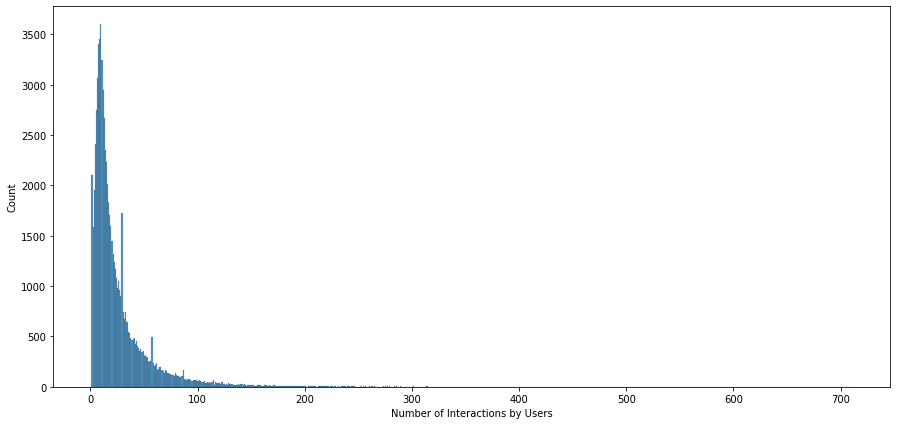

In [26]:
#Plotting user-song interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')

plt.show()

- The user-song distribution has a long tail to the right. Few users played the songs more than one time. As we can not see the detailed numbers from this graph. I am going to look at the statistics of the distribution in details next.

**Statistics of the user-song interactions.**

In [27]:
count_interactions.describe().T

count    76353.000000
mean        26.194125
std         31.625078
min          1.000000
25%          9.000000
50%         16.000000
75%         31.000000
max        711.000000
Name: song_id, dtype: float64

- We see that the mean number of songs a user played is 26 which is higher than the median which is 16. This is expected because the distribution has a long tail to the right to skew the mean to the right. Median is resistant to outliers and therefore is smaller than the mean. 
- 25% of users listened to less than 9 songs and 75% users listened to less than 31 songs.

**For each song, how many times does it got to be played?**

In [28]:
#Finding song playcount interactions distribution

play_count_interactions = df.groupby('song_id').count()['play_count']
play_count_interactions.describe().T


count    10000.000000
mean       200.000000
std        317.715673
min         48.000000
25%         89.000000
50%        124.000000
75%        201.000000
max       8277.000000
Name: play_count, dtype: float64

- The mean number of times a song is played is 200 which is bigger than the median which is 124 due to the distribution has a long tail to the right.
- The minimum number of times a song is played is 48. 25% of the songs got played for less than 89 times and 75% of the songs got played for less than 201 times. The maximum number of times a songs is played is 8277 which we have observed earlier.
- The graph below is a visualization of the distribution.

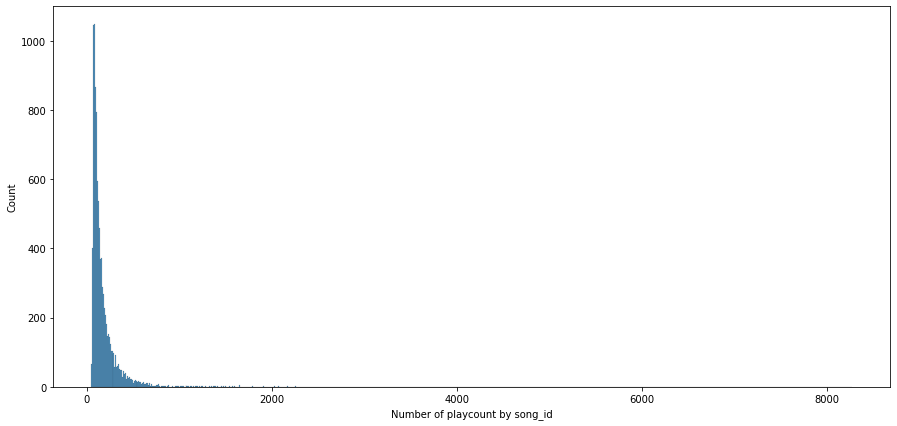

In [29]:
#Plotting playcount interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(play_count_interactions)

plt.xlabel('Number of playcount by song_id')

plt.show()

Graph the number of songs by time period.

<AxesSubplot:xlabel='decade', ylabel='count'>

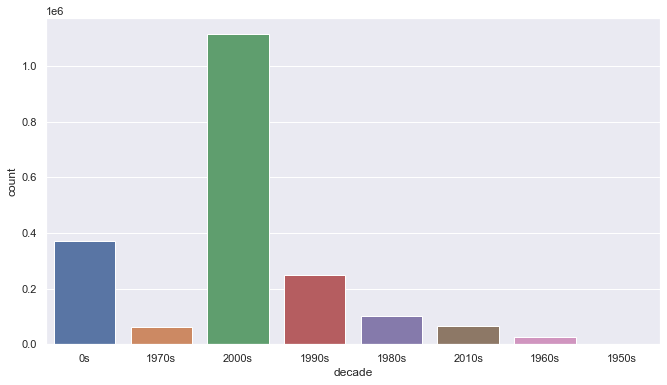

In [30]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df['decade'])

**For each user, how many times do they listen to songs?**

In [31]:
#Finding user playcount interactions distribution

user_count_interactions = df.groupby('user_id').count()['play_count']
user_count_interactions.describe().T

count    76353.000000
mean        26.194125
std         31.625078
min          1.000000
25%          9.000000
50%         16.000000
75%         31.000000
max        711.000000
Name: play_count, dtype: float64

- Note this summary statistics is exactly the same as the user-song interactions summary statistics.
- Let's look at the play_count distribution in the dataframe to see why the distribution of the number of songs a user listened to is the same as the total number of times a user listened to the songs.

**Look at the summary statistics of play_count from df.**

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_count,2000000.0,3.045485,6.579720,1.0,1.0,1.0,3.0,2213.0
year,2000000.0,1628.644749,778.728286,0.0,1984.0,2002.0,2007.0,2010.0


- For every song, half of the users only played it one time.
- For the same song, 75% of users played it less than 3 times.
- This explains why the distribution of the number of songs a user listend to is the same as the total number fo times a user listened to the songs. Becauase half of the users only played each song they listened to one time, the number of songs a user listened to is the same as the total number of times a user listened to the songs for these users. Since 75% of users has play count less than 3. So the number of songs a user listened to is very similar to the total number of times a user listened to the songs.
- Therefore whenever it is convenient, I will either use the number of times a song_id appears in the dataset or the total number of play_count for a song_id. They are interchangable for our case.

### **Method 1: Rank Based Recommendation System**

- Rank-based recommendation systems provide recommendations based on the most popular items. This kind of recommendation system is useful when we have **cold start** problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend songs to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use rank-based recommendation system to recommend songs to the new user.
- Traditional rank-based recommendation will only recommend those popular items based on the assumption that a new user would be the same as the majority of the previous users. This generates a problem: many songs will never be recommended to anyone.
- For this reason, I decided to **combine rank-based recommendation with one recommendation randomly selected from the songs that are not in the popular list**. The rationale behind this algorithm is to give less popular songs a chance to be listened by users. In addition, a new user may very well not be the same as the majority of the existing users. Since we don't have any information about the new user, it is reasonable to assume that the probability of a new user be **different** from the majority of the existing users is the **same** as she/he be the same as the existing users.

To build the rank-based recommendation system, we take **play_count** for each song and then rank them in descending order.

In [33]:
#Calculating the play_count of each song
count = df.groupby('song_id').count()['play_count']
print(count)
#Making a dataframe with the play_count
df_play_count = pd.DataFrame({'play_count':count})
print(df_play_count)

song_id
SOAAAGQ12A8C1420C8     66
SOAACPJ12A81C21360    147
SOAACSG12AB018DC80     67
SOAAEJI12AB0188AB5     62
SOAAFAC12A67ADF7EB    190
                     ... 
SOZZTNF12A8C139916    270
SOZZVWB12AB0189C30    138
SOZZWZV12A67AE140F    119
SOZZYAO12A6701FF36     76
SOZZZPV12A8C1444B5     71
Name: play_count, Length: 10000, dtype: int64
                    play_count
song_id                       
SOAAAGQ12A8C1420C8          66
SOAACPJ12A81C21360         147
SOAACSG12AB018DC80          67
SOAAEJI12AB0188AB5          62
SOAAFAC12A67ADF7EB         190
...                        ...
SOZZTNF12A8C139916         270
SOZZVWB12AB0189C30         138
SOZZWZV12A67AE140F         119
SOZZYAO12A6701FF36          76
SOZZZPV12A8C1444B5          71

[10000 rows x 1 columns]


In [34]:
df_play_count_sort=df_play_count.sort_values(by='play_count', ascending=False)
df_play_count_sort

,play_count
song_id,
SOFRQTD12A81C233C0,8277
SOAUWYT12A81C206F1,7032
SOAXGDH12A8C13F8A1,6949
SOBONKR12A58A7A7E0,6412
SOSXLTC12AF72A7F54,6145
...,...
SOWNLZF12A58A79811,51
SOLIGVL12AB017DBAE,51
SOBPGWB12A6D4F7EF3,50


Add index to df_play_count_sort_reset.

In [35]:
df_play_count_sort_reset=df_play_count_sort.reset_index()
df_play_count_sort_reset

,song_id,play_count
0,SOFRQTD12A81C233C0,8277
1,SOAUWYT12A81C206F1,7032
2,SOAXGDH12A8C13F8A1,6949
3,SOBONKR12A58A7A7E0,6412
4,SOSXLTC12AF72A7F54,6145
...,...,...
9995,SOWNLZF12A58A79811,51
9996,SOLIGVL12AB017DBAE,51
9997,SOBPGWB12A6D4F7EF3,50
9998,SOYYBJJ12AB017E9FD,48


In [36]:
#If we want the song_id for the third most played songs, we can do the following.
df_play_count_sort_reset.iat[2,0]

'SOAXGDH12A8C13F8A1'

Now create a function that gives the recommendation of n songs in which n-1 are the most popular songs in terms of play count and one is randomly selected from the rest of the 10000-n+1 songs.

In [37]:
def top_n_songs(n):
    idx=[i for i in range(n-1,len(df_play_count_sort_reset))] # Create a list with numbers starting from n-1 and goes up to number of rows minus 1.
    rand_idx = random.randrange(0,len(df_play_count_sort_reset)-n)#Randomly select a number from 0 to number or rows minus n, minus 1.
    random_num = idx[rand_idx]
    popular=[i for i in range(0,n-1)]
    popular.append(random_num)
   
    
    return df_play_count_sort_reset.iloc[popular,0]



We can **use this function with different n's** to get songs to recommend.

#### **Recommending top 10 songs based on popularity and promotion of unpopular songs.**

In [38]:
top_n_songs(10)

0       SOFRQTD12A81C233C0
1       SOAUWYT12A81C206F1
2       SOAXGDH12A8C13F8A1
3       SOBONKR12A58A7A7E0
4       SOSXLTC12AF72A7F54
5       SONYKOW12AB01849C9
6       SOEGIYH12A6D4FC0E3
7       SOLFXKT12AB017E3E0
8       SODJWHY12A8C142CCE
7674    SOLJZEL12AB018D3B4
Name: song_id, dtype: object

**Summary:** 
- For this recommendation system, the first 9 songs are based on popularity and the last one is based on a random selection.
- This type of recommendation works for new users of whom we have no information about. My method helps to give songs that are less played a chance to be recommended. The rationale behind it is that a new user from whom we have no information about has a good probability of not being the same as the majority of the original users.
- It is not personalized recommendation. For every given user, the top 9 songs recommended will be the same and the 10th song is a random selection from the the rest of the other songs (excluding the top 9 songs).


Now build a **collaborative filtering based recommendation system**.
- In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system.
- There are mainly two types of collaborative filtering based recommendation systems: **similarity/Neighborhood based** and **model based**.

### **Method 2: Similarity/Neighborhood Based Collaborative Filtering**

First, we compute the **user-item interactions matrix**

In [39]:
interactions_matrix = df.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix


song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZKPR12A6D4F8147,SOZZLTY12A67AE0AD0,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_id,,,,,,,,,,,,,,,,,,,,,
00003a4459f33b92906be11abe0e93efc423c0ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00030033e3a2f904a48ec1dd53019c9969b6ef1f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007235c769e610e3d339a17818a5708e41008d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffce9c1537fbc350ea68823d956eaa8f5236dbe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffd6a2bdef646ce9898b628d5dd56c43df69a9d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffd9635b33f412de8ed02e44e6564e3644cf3c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- This is a very **sparse matrix** with 76353 rows and 10000 columns. 
- Since the matrix is extremely sparse, there is not enough ram to fill all the NaN by 0s using Google colab. Therefore, I picked top 5000 most played songs and top 5000 most interacted users with these songs to analyze.
- I can extend it to more number of songs later when there is better computational power. 



**Now find the top  5000 most played songs and the top 5000 most interacted users with these songs:**

In [40]:

top_5000_songs=pd.DataFrame({'song_id':df['song_id'].value_counts()[:5000].index})
top_5000_users=pd.DataFrame({'user_id':df[df['song_id'].isin(top_5000_songs['song_id'])]['user_id'].value_counts()[:5000].index})
#top_1000_users = pd.DataFrame({'user_id':reviews[reviews['business_id'].isin(top_1000_businesses['business_id'])]['user_id'].value_counts()[:1000].index})

In [41]:
top_5000_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [42]:
top_5000_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


Now build a subset of the orginial dataset using the top 5000 songs and 5000 users.

In [43]:
df_small=top_5000_songs.merge(df,how='inner',on='song_id')
df_small.shape



(1547961, 8)

In [44]:
df_small=top_5000_users.merge(df_small,how='inner',on='user_id')
df_small.shape


(461612, 8)

In [45]:
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,decade
0,fbee1c8ce1a346fa07d2ef648cec81117438b91f,SOSXLTC12AF72A7F54,1,Revelry,Only By The Night,Kings Of Leon,2008,2000s
1,fbee1c8ce1a346fa07d2ef648cec81117438b91f,SOWCKVR12A8C142411,4,Use Somebody,Use Somebody,Kings Of Leon,2008,2000s
2,fbee1c8ce1a346fa07d2ef648cec81117438b91f,SOKLRPJ12A8C13C3FE,2,The Scientist,The Scientist,Coldplay,2002,2000s
3,fbee1c8ce1a346fa07d2ef648cec81117438b91f,SOCVTLJ12A6310F0FD,7,Clocks,A Rush Of Blood To The Head,Coldplay,2002,2000s
4,fbee1c8ce1a346fa07d2ef648cec81117438b91f,SOSCIZP12AB0181D2F,1,Alejandro,The Fame Monster,Lady GaGa,2009,2000s


Now we can build our sparse matrix:

In [46]:
interactions_matrix_small = df_small.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_small.shape

(5000, 5000)

In [47]:
interactions_matrix_small

song_id,SOAACPJ12A81C21360,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAROC12A6D4FA420,SOAATLI12A8C13E319,SOAAUKC12AB017F868,SOAAVUV12AB0186646,SOAAWEE12A6D4FBEC8,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,...,SOZYBGN12A8C13A93C,SOZYDZR12A8C13F4F0,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZZHQT12AB018B714,SOZZIOH12A67ADE300,SOZZLZN12A8AE48D6D,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30
user_id,,,,,,,,,,,,,,,,,,,,,
000ebc858861aca26bac9b49f650ed424cf882fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00185e316f07f0f00c325ca034be59c15b362401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028292aa536122c1f86fd48a39bd83fe582d27f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0031572620fa7f18487d3ea22935eb28410ecc4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003d0f3aac94fd261bb74c0124a90750579972d4,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc564b85d81f0ea427cee3eea2415cc2fc5c4be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffd458f903d49854685cf4540245c1d297e8bafa,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 5000 unique songs and 5000 unique users present in the above dataset. So, there is a possibility of 5000 * 5000 = 25,000,000 user-songs interactions. But we only have a total of 461,701, which is why we are getting a sparse user business interactions matrix above with the majority of the values being NaN.


In [48]:
interactions_matrix_small.fillna(0,inplace=True)

In [49]:
sparsity=100*(1-df_small.shape[0]/(interactions_matrix_small.shape[0]*interactions_matrix_small.shape[1]))
print('Sparsity of df_small is', sparsity)

Sparsity of df_small is 98.153552


Get the song_id names.

In [50]:
#Get the column names and save it in col_names.
col_names=interactions_matrix_small.columns.values.tolist()
song_id_names=col_names


Get the user_id names.

In [51]:
row_names=interactions_matrix_small.index.values.tolist()
user_id_names=row_names

In [52]:
len(row_names)

5000

Change the column names and row  names to their corresponding index and rebuild the interactions_matrix_new. Now the rows and columns are all indexed by numbers. 

In [53]:
for i in range(0,5000):
  col_names[i]=i
print(col_names)  
interactions_matrix_small.columns=col_names


for i in range(0,5000):
  row_names[i]=i
interactions_matrix_small.index=row_names  

print(interactions_matrix_small)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Below is one of the techniques to measure similarity of different users using **cosine similarities**.  Here each user is denoted by a **vector of 5000 dimensions**. Then we will find out pairwise **cosine similarities** for all the users. If two vectors i.e. users are exactly same or lie on top each other, then they are most similar and cosine similarity will be 1

Now, create a **function to find similar users and similarity scores for given user_id and interaction matrix**

In [54]:
def similar_users(j, interactions_matrix_small):
    similarity = [] 
    for user in interactions_matrix_small.index:
        
        #finding cosine similarity between the user_id and each user
        
        sim = cosine_similarity([interactions_matrix_small.loc[j]], [interactions_matrix_small.loc[user]])
        
            #Appending the user and the corresponding similarity score with user_id as a tuple 
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)   #Sorting the list on the basis of similarity scores
    
    most_similar_users = [tup[0] for tup in similarity] #Extracting the user from each tuple in the sorted list
    
    similarity_score = [tup[1] for tup in similarity]   #Extracting the similarity score from each tuple in the sorted list
    
    most_similar_users.remove(j)                  #Removing the original user and keeping only other similar users       
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

**We can use this function to find similar users for different user_id.**

#### Find out top 10 similar users to the user_id corresponding to index=3 and their similarity score.


In [55]:
similar_users(3, interactions_matrix_small)[0][:10]

[4353, 3693, 4349, 1600, 3550, 3696, 223, 3123, 2731, 4323]

#### Find out top 10 similar users to the user_id corresponding to index=200 and their similarity score.

In [56]:
similar_users(200, interactions_matrix_small)[0][:10]

[1725, 3353, 3552, 1256, 1325, 1417, 1493, 2583, 3196, 1438]

- These are the top 10 users that are most similar to the user with index 200.

We can also find the level of similarity between similar users and the user with index n.

In [57]:
similar_users(200, interactions_matrix_small)[1][:10]

[array([[0.31673558]]),
 array([[0.28423399]]),
 array([[0.25854406]]),
 array([[0.25389626]]),
 array([[0.24911423]]),
 array([[0.24771717]]),
 array([[0.24124435]]),
 array([[0.24047396]]),
 array([[0.23285617]]),
 array([[0.22003988]])]

Next, we find the **songs which have been played the most by similar users** but not by the user of interest.

Now, create a function to do it.

In [58]:
def recommendations(j, num_of_songs, interactions_matrix_small):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(j, interactions_matrix_small)[0]  
    
    #Finding song_id s with which the user j has interacted
    song_ids = set(list(interactions_matrix_small.columns[np.where(interactions_matrix_small.loc[j] > 0)]))
    recommendations = []
    
    observed_interactions = song_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_songs:
            #Finding 'n' songs which have been played by similar users but not by the user_id
            similar_user_song_ids = set(list(interactions_matrix_small.columns[np.where(interactions_matrix_small.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_song_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_song_ids)
        else:
            break
    
    return recommendations[:num_of_songs]

Finally, we can recommend **`n`** number of songs to any user using the function defined above. 

#### **Recommend 10 songs to user with index 200 based on similarity based collaborative filtering**

In [59]:
recommendations(200, 10, interactions_matrix_small)

[896, 4481, 3, 3076, 2565, 3715, 1670, 3082, 2828, 2830]

In [60]:
def get_the_title(index):
    return df_small[df_small.index==index]['title'].values[0]
    

In [61]:
get_the_title(3)

'Clocks'

**Similarity based collaborative filtering requires the interaction matrix to be not too sparse so that similar users or items can be identified. Our data set is too sparse with sparsity 98.15316%. This means we only have about 2% of non empty entries. So similarity based colllaborative filtering does not work well in this situation. Therefore, I will consider model based collaborative filtering using matrix factorization.**

### **3. Model Based Collaborative Filtering - Matrix Factorization.**

- Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.
- I will use **SVD** to compute the latent features from the user-item matrix that we already learned earlier. But SVD does not work when we missing values in the user-item matrix.
- I already found the user-item matrix when computing cosine similarity. The matrix is given by **interactions_matrix_small**.

Perform the decomposition using the **`svd() function`** from the linalg module of the NumPy library.

In [62]:
u, s, vt = np.linalg.svd(interactions_matrix_small, full_matrices=False)

In [63]:
u.shape 

(5000, 5000)

In [64]:
s.shape

(5000,)

In [65]:
vt.shape

(5000, 5000)

**Splitting the dataset and selecting optimal latent variables**
Now, we need to find the appropriate K to use in order to re-generate the interaction matrix and make predictions. We will split the data into **train and test data** and make predictions for different value of K. We will choose the K which gives good performance on the train and test data.

Split the data into train and test data.

In [66]:
X_train, X_test = train_test_split(df_small, test_size=0.2, random_state=42)

In [67]:
X_train.shape # want to do this to get the best version of number of ...

(369289, 8)

In [68]:
X_test.shape

(92323, 8)

Create the **train and test interactions matrices**.

In [69]:
#Train interaction matrix
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_train.fillna(0, inplace=True)

In [70]:
interactions_matrix_train.shape

(5000, 5000)

In [71]:
#Test interaction matrix
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_test.fillna(0, inplace=True)

In [72]:
interactions_matrix_test.shape

(5000, 4996)

I will use the **interactions_matrix_train** to find U, S, and V transpose using SVD. Then find the subset of rows in the **interactions_matrix_test** dataset which I can predict using this matrix decomposition with different numbers of latent features.

In [73]:
#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
    
#Finding unique songs in train and test data and then taking their intersection
#i.e. common songs in train and test data 
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)

#Selecting only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]

In [74]:
interactions_matrix_test.shape

(5000, 4996)

Now, let's decompose the **interactions_matrix_train** and **find the U and Vt for the test data** using the common users and movies in the train and test data.

In [75]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [76]:
#Finding u_test and vt_test matrices using u_train, vt_train and common user/movies in train and test data
row_idxs = interactions_matrix_train.index.isin(test_idx)
col_idxs = interactions_matrix_train.columns.isin(test_songs)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

We have calculated U and Vt matrices for the train as well as test data. Now, we need to find the number of latent features that give us the **lowest RMSE on the train and the test data**.

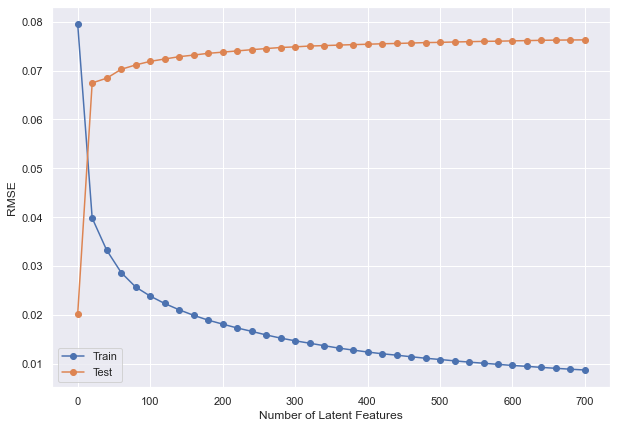

In [77]:
#Creating array for number of latent features and empty lists to store train and test errors
latent_features = np.arange(0, 710, 20) 
train_error = []
test_error = []

for k in latent_features:
    #Slicing the U, S, and Vt matrices to get k latent features from train and test data 
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    #Regenerating train and test interaction matrices using k latent features
    interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))
    
    #Calculating the actual and predicted average play_count for each song in the training data
    avg_play_count_train = interactions_matrix_train.mean(axis=0)
    avg_play_count_train_pred = interactions_matrix_train_preds.mean(axis=0)
    
    #Calculating the actual and predicted average play_count for each song in the test data
    avg_play_count_test = interactions_matrix_test.mean(axis=0)
    avg_play_count_test_pred = interactions_matrix_test_preds.mean(axis=0)
    
    #Calculating train and test RMSE
    train_rmse = mean_squared_error(avg_play_count_train, avg_play_count_train_pred, squared=False)
    test_rmse = mean_squared_error(avg_play_count_test, avg_play_count_test_pred, squared=False)
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    
#Plotting train and test RMSE
plt.figure(figsize=(10,7))
plt.plot(latent_features, train_error, label='Train', marker='o');
plt.plot(latent_features, test_error, label='Test', marker='o');
plt.xlabel('Number of Latent Features');
plt.ylabel('RMSE');
plt.legend();

From the above plot we can see that we got a **reasonable RMSE in both train and test dataset has  latent features be less than 100.** If we increase the latent features it will be overfitted and decreasing the latent features will underfit the model.

Reconstruct the original interaction matrix using latent features = 10 in the same way as above

In [78]:
s_final, u_final, vt_final = np.diag(s[:10]), u[:, :10], vt[:10, :]
songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
songs_predicted_play_count.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have the predictions of play counts but we need to create a **function to recommend songs** to the users on the basis of predicted play counts for each song.

In [79]:
# Recommend the songs with the highest predicted play counts

def recommend_songs(user_idx, interactions_matrix_small, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_play_count = interactions_matrix_small.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_play_count, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_play_count', 'user_predictions']
    
    #Filtering the dataframe where actual play count are 0 which implies that the user has not interacted with that song.
    temp = temp.loc[temp.user_play_count == 0]   
    
    #Recommending movies with top predicted play counts.
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

Now, let's use the function defined above to **recommend songs to a user**

In [80]:
user_index = 121
num_recommendations = 10
recommend_songs(user_index, interactions_matrix_small, songs_predicted_play_count, num_recommendations)


Below are the recommended songs for user(user_id = 121):

Recommended Songs
4940    1.0
172     1.0
3103    1.0
1079    1.0
3967    1.0
43      1.0
3356    0.0
3335    0.0
3340    0.0
3339    0.0
Name: user_predictions, dtype: float64


Finally, we can **calculate the RMSE** for the final play counts predicted using the model-based recommendation system.

In [81]:
#Create a dataframe containing average actual play counts and avearge predicted play counts of the songs
rmse_df = pd.concat([interactions_matrix_small.mean(), songs_predicted_play_count.mean()], axis=1)
rmse_df.columns = ['Avg_actual_play_count', 'Avg_predicted_play_count']
rmse_df

,Avg_actual_play_count,Avg_predicted_play_count
0,0.0392,0.0000
1,0.0204,0.0000
2,0.0476,0.0012
3,0.0350,0.0002
4,0.0116,0.0000
...,...,...
4995,0.0428,0.0000
4996,0.0148,0.0000
4997,0.0278,0.0016
4998,0.0218,0.0000


In [82]:
RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.052709027917426064 



**RMSE** for the SVD model with **10 latent features** is **0.05167420369971849**.

Use latent feature 5.

In [83]:
s_final, u_final, vt_final = np.diag(s[:5]), u[:, :5], vt[:5, :]
songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
songs_predicted_play_count.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Recommend the songs with the highest predicted play counts

def recommend_songs(user_idx, interactions_matrix_small, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_play_count = interactions_matrix_small.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_play_count, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_play_count', 'user_predictions']
    
    #Filtering the dataframe where actual play count are 0 which implies that the user has not interacted with that song.
    temp = temp.loc[temp.user_play_count == 0]   
    
    #Recommending movies with top predicted play counts.
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [85]:
user_index = 121
num_recommendations = 10
recommend_songs(user_index, interactions_matrix_small, songs_predicted_play_count, num_recommendations)


Below are the recommended songs for user(user_id = 121):

Recommended Songs
3907    1.0
156     1.0
1507    1.0
1079    1.0
4625    1.0
172     1.0
3332    0.0
3333    0.0
3334    0.0
3335    0.0
Name: user_predictions, dtype: float64


In [86]:
#Create a dataframe containing average actual play counts and avearge predicted play counts of the songs
rmse_df = pd.concat([interactions_matrix_small.mean(), songs_predicted_play_count.mean()], axis=1)
rmse_df.columns = ['Avg_actual_play_count', 'Avg_predicted_play_count']
rmse_df

,Avg_actual_play_count,Avg_predicted_play_count
0,0.0392,0.0000
1,0.0204,0.0000
2,0.0476,0.0006
3,0.0350,0.0000
4,0.0116,0.0000
...,...,...
4995,0.0428,0.0000
4996,0.0148,0.0000
4997,0.0278,0.0002
4998,0.0218,0.0000


In [87]:
RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.05757616645800587 



**RMSE** for the SVD model with **5 latent features** is **0.05767311671827698**.

Try latent feature 7.

In [88]:
s_final, u_final, vt_final = np.diag(s[:7]), u[:, :7], vt[:7, :]
songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
songs_predicted_play_count.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# Recommend the songs with the highest predicted play counts

def recommend_songs(user_idx, interactions_matrix_small, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_play_count = interactions_matrix_small.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_play_count, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_play_count', 'user_predictions']
    
    #Filtering the dataframe where actual play count are 0 which implies that the user has not interacted with that song.
    temp = temp.loc[temp.user_play_count == 0]   
    
    #Recommending movies with top predicted play counts.
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [90]:
user_index = 121
num_recommendations = 10
recommend_songs(user_index, interactions_matrix_small, songs_predicted_play_count, num_recommendations)


Below are the recommended songs for user(user_id = 121):

Recommended Songs
4940    1.0
3907    1.0
172     1.0
3103    1.0
1079    1.0
3337    0.0
3343    0.0
3342    0.0
3341    0.0
3340    0.0
Name: user_predictions, dtype: float64


In [91]:
#Create a dataframe containing average actual play counts and avearge predicted play counts of the songs
rmse_df = pd.concat([interactions_matrix_small.mean(), songs_predicted_play_count.mean()], axis=1)
rmse_df.columns = ['Avg_actual_play_count', 'Avg_predicted_play_count']
rmse_df

,Avg_actual_play_count,Avg_predicted_play_count
0,0.0392,0.0000
1,0.0204,0.0000
2,0.0476,0.0008
3,0.0350,0.0000
4,0.0116,0.0000
...,...,...
4995,0.0428,0.0000
4996,0.0148,0.0000
4997,0.0278,0.0002
4998,0.0218,0.0000


In [92]:
RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.05387188439251035 



**RMSE** for the SVD model with **7 latent features** is **0.05459135345455359**.

Try 16 latent features.

In [93]:
s_final, u_final, vt_final = np.diag(s[:16]), u[:, :16], vt[:16, :]
songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
songs_predicted_play_count.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Recommend the songs with the highest predicted play counts

def recommend_songs(user_idx, interactions_matrix_small, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_play_count = interactions_matrix_small.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_play_count, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_play_count', 'user_predictions']
    
    #Filtering the dataframe where actual play count are 0 which implies that the user has not interacted with that song.
    temp = temp.loc[temp.user_play_count == 0]   
    
    #Recommending movies with top predicted play counts.
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [95]:
user_index = 121
num_recommendations = 10
recommend_songs(user_index, interactions_matrix_small, songs_predicted_play_count, num_recommendations)


Below are the recommended songs for user(user_id = 121):

Recommended Songs
4940    1.0
1079    1.0
2662    1.0
4312    1.0
3103    1.0
172     1.0
304     1.0
3337    0.0
3341    0.0
3340    0.0
Name: user_predictions, dtype: float64


In [96]:
#Create a dataframe containing average actual play counts and avearge predicted play counts of the songs
rmse_df = pd.concat([interactions_matrix_small.mean(), songs_predicted_play_count.mean()], axis=1)
rmse_df.columns = ['Avg_actual_play_count', 'Avg_predicted_play_count']
rmse_df

,Avg_actual_play_count,Avg_predicted_play_count
0,0.0392,0.0004
1,0.0204,0.0000
2,0.0476,0.0016
3,0.0350,0.0004
4,0.0116,0.0000
...,...,...
4995,0.0428,0.0000
4996,0.0148,0.0000
4997,0.0278,0.0020
4998,0.0218,0.0000


In [97]:
RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.049801917714080046 



RMSE **decreases** as I change the number of latent features from 10 to 16. Now increase latent features to try.

In [98]:
# compute RMSE for latent features=10.
s_final, u_final, vt_final = np.diag(s[:10]), u[:, :10], vt[:10, :]
songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
a={10:RMSE}
# compute RMSE for latent features from 11 to 100
for i in range(10,100):
    s_final, u_final, vt_final = np.diag(s[:i]), u[:, :i], vt[:i, :]
    songs_predicted_play_count = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
    songs_predicted_play_count = pd.DataFrame(abs(songs_predicted_play_count), columns = interactions_matrix_small.columns, index = interactions_matrix_small.index)
    RMSE = mean_squared_error(rmse_df['Avg_actual_play_count'], rmse_df['Avg_predicted_play_count'], squared=False)
   # print('\nRMSE SVD Model = {} \n'.format(RMSE))
    a[i]=RMSE  
    def recommend_songs(user_idx, interactions_matrix_small, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
        sorted_user_play_count = interactions_matrix_small.loc[user_idx].sort_values(ascending=False)
        sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted ratings columns
        temp = pd.concat([sorted_user_play_count, sorted_user_predictions], axis=1)
        temp.index.name = 'Recommended Songs'
        temp.columns = ['user_play_count', 'user_predictions']
    
    #Filtering the dataframe where actual play count are 0 which implies that the user has not interacted with that song.
        temp = temp.loc[temp.user_play_count == 0]   
    
    #Recommending songs with top predicted play counts.
        temp = temp.sort_values('user_predictions', ascending=False)
        print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_index))
        print(temp['user_predictions'].head(num_recommendations))
#Create a dataframe containing average actual play counts and avearge predicted play counts of the songs
    rmse_df = pd.concat([interactions_matrix_small.mean(), songs_predicted_play_count.mean()], axis=1)
    rmse_df.columns = ['Avg_actual_play_count', 'Avg_predicted_play_count']
a.items()
# find the minimum by comparing the second elemnt of each tuple
min(a.items(),key=lambda x:x[1])  


(95, 0.038042273433642214)

In [99]:
print(a.items())

dict_items([(10, 0.049801917714080046), (11, 0.052709027917426064), (12, 0.05107363398075371), (13, 0.05102384101574478), (14, 0.05183708494890507), (15, 0.05182253038978317), (16, 0.05005756646102565), (17, 0.049801917714080046), (18, 0.050015311895458575), (19, 0.049047338684173276), (20, 0.048736167186187306), (21, 0.04780269749710784), (22, 0.04689739267805834), (23, 0.0457758755678141), (24, 0.046054865280445674), (25, 0.0460914444989523), (26, 0.044139681738771065), (27, 0.04382246985280497), (28, 0.0437493911271917), (29, 0.04271969606633456), (30, 0.04277024919263389), (31, 0.043059946400338216), (32, 0.04323991406096918), (33, 0.04332805059081241), (34, 0.04281276034081428), (35, 0.042442144620648), (36, 0.042695203477674165), (37, 0.04229468250265038), (38, 0.04199950885427114), (39, 0.042000837039278156), (40, 0.04201228001430058), (41, 0.0418449987453698), (42, 0.04140437715990907), (43, 0.041513338579304844), (44, 0.040888423202662144), (45, 0.040802637855903386), (46, 0.0

This gives RMSE for different number features ranging from 10 to 100. **We can see that the smallest RMSE is reached when number of latent features is 88 and the corresponding RMSE is 0.038191568074641816.**

**Conclusion**
- RMSE is low using SVD and therefore I recommend use collaborative filtering with SVD.
- Since we do not have much information about the genre of the songs and demographics of the users, content based recommendation is not applied to this problem.
- Since our interaction matrix is highly sparse, similarity based collaborative filtering does not work well in this situation.
- For **new users**, use Rank Based Recommendation.
- For **existing users**, use collaborative filtering with SVD.